   sector_id              sector_nombre  variable_id  \
0          4  Automotriz y Autopartista           29   
1          4  Automotriz y Autopartista           29   
2          4  Automotriz y Autopartista           29   
3          4  Automotriz y Autopartista           29   
4          4  Automotriz y Autopartista           29   

  actividad_producto_nombre      indicador unidad_de_medida fuente  \
0               Automotores  Patentamiento         unidades  ACARA   
1               Automotores  Patentamiento         unidades  ACARA   
2               Automotores  Patentamiento         unidades  ACARA   
3               Automotores  Patentamiento         unidades  ACARA   
4               Automotores  Patentamiento         unidades  ACARA   

  frecuencia_nombre cobertura_nombre alcance_tipo  alcance_id  \
0           Mensual         Nacional    PROVINCIA           2   
1           Mensual         Nacional    PROVINCIA           2   
2           Mensual         Nacional    PROVINC

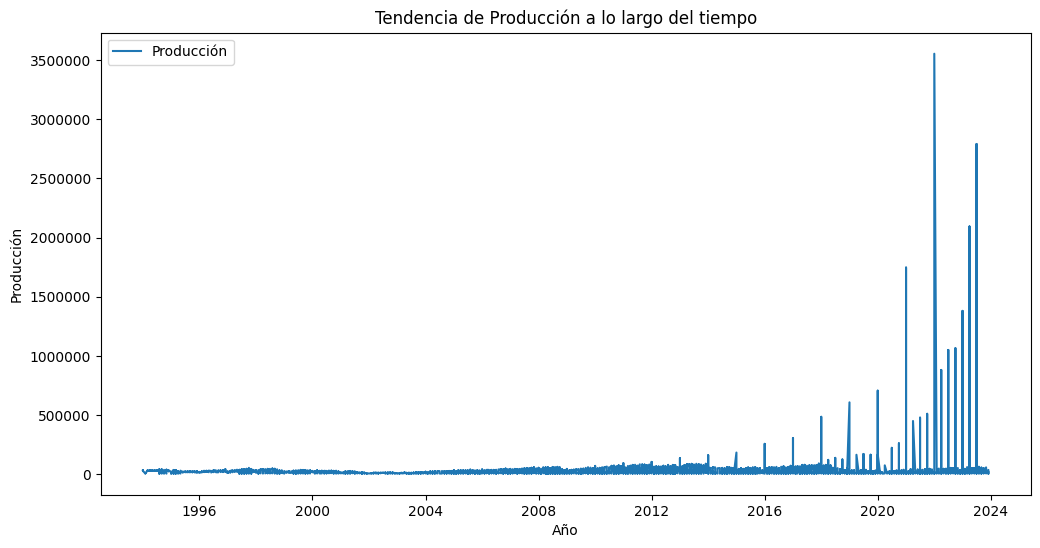

Promedio de Producción por Mes:
mes
April        37301.665045
August       26750.015385
December     22573.916300
February     21079.465021
January      55825.913380
July         40218.084735
June         25433.669291
March        25745.634921
May          25878.064000
November     25751.465863
October      32016.448192
September    26506.697318
Name: valor, dtype: float64


C:\Users\Alecito\AppData\Local\Temp\ipykernel_66240\3766599909.py:80: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='mes', y='valor', data=df, ci=None)


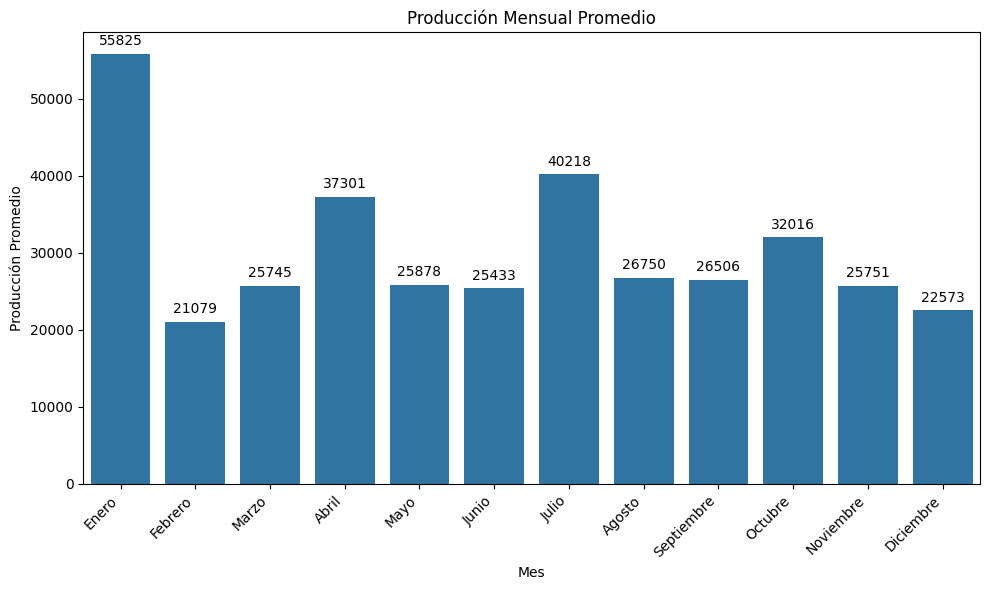


Crecimiento Mensual:
     indice_tiempo                       actividad_producto_nombre  \
6288    1994-01-01                       Automóviles y Utilitarios   
5928    1994-01-01                                     Automóviles   
7558    1994-01-01                           Vehículos automotores   
8166    1994-01-01  Venta a concesionarios de vehículos nacionales   
5929    1994-02-01                                     Automóviles   
...            ...                                             ...   
8165    2023-12-01                          Venta a concesionarios   
5927    2023-12-01                          Automotores_nacionales   
6287    2023-12-01                                     Automóviles   
7557    2023-12-01                                     Utilitarios   
8525    2023-12-01  Venta a concesionarios de vehículos nacionales   

      crecimiento_mensual  
6288                  NaN  
5928            -0.140254  
7558             0.188890  
8166            -0.128491

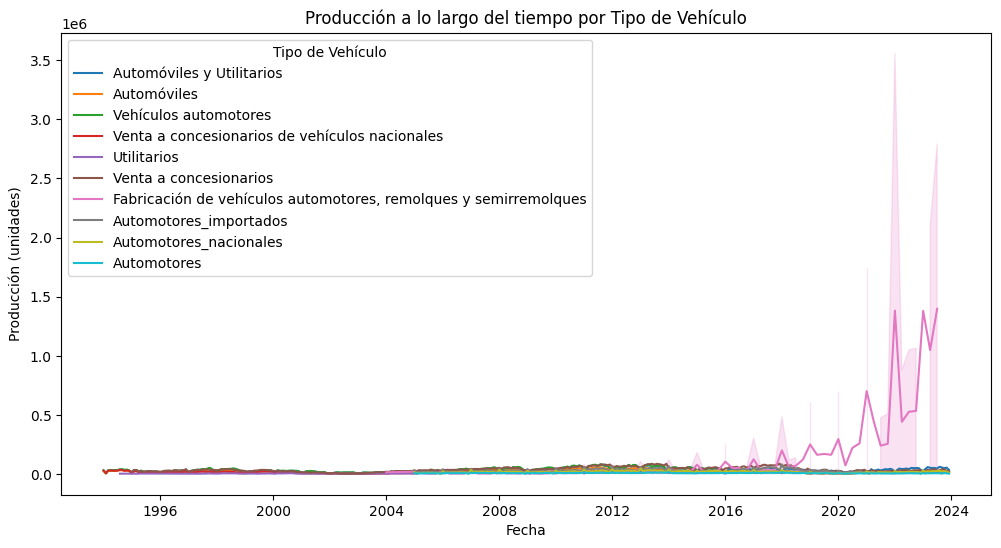

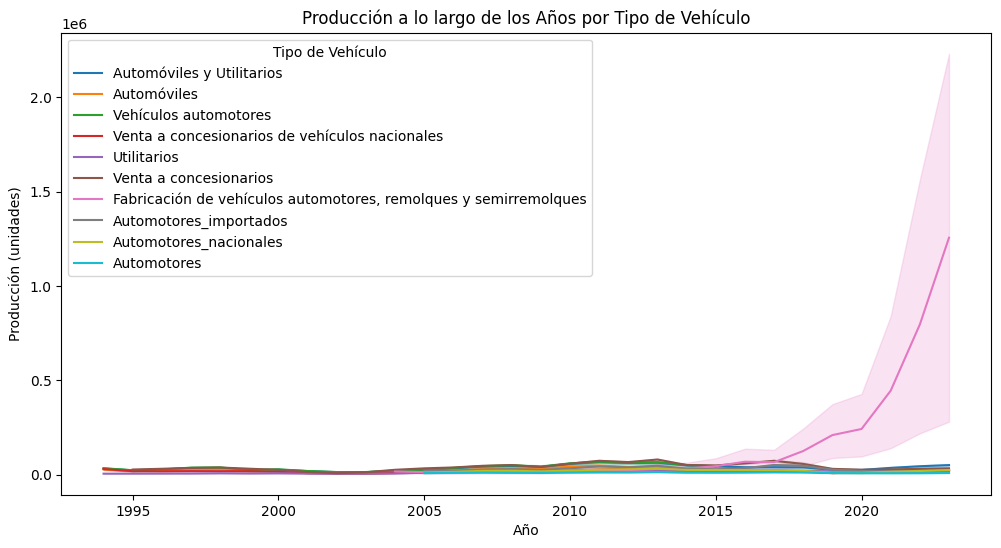

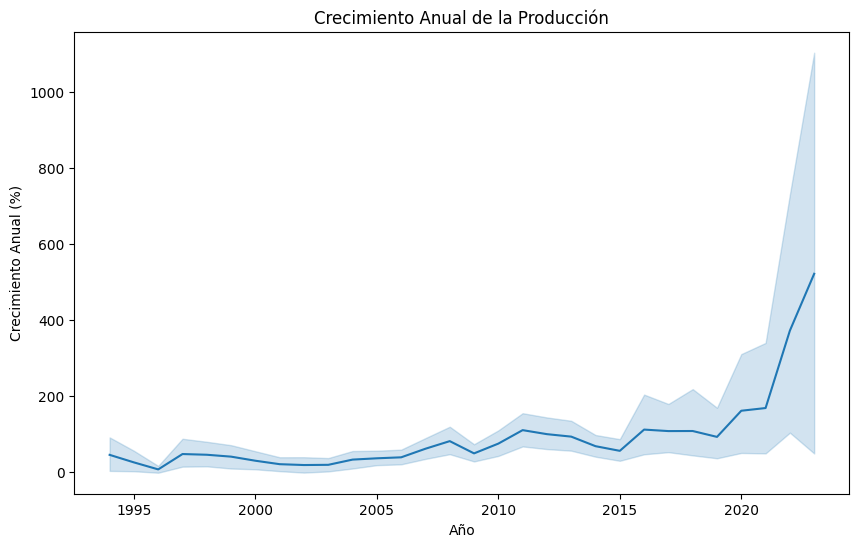

C:\Users\Alecito\AppData\Local\Temp\ipykernel_66240\3766599909.py:147: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot_region_tipo = sns.barplot(x='alcance_nombre', y='valor', data=df_filtered_region_tipo, hue='actividad_producto_nombre', ci=None)


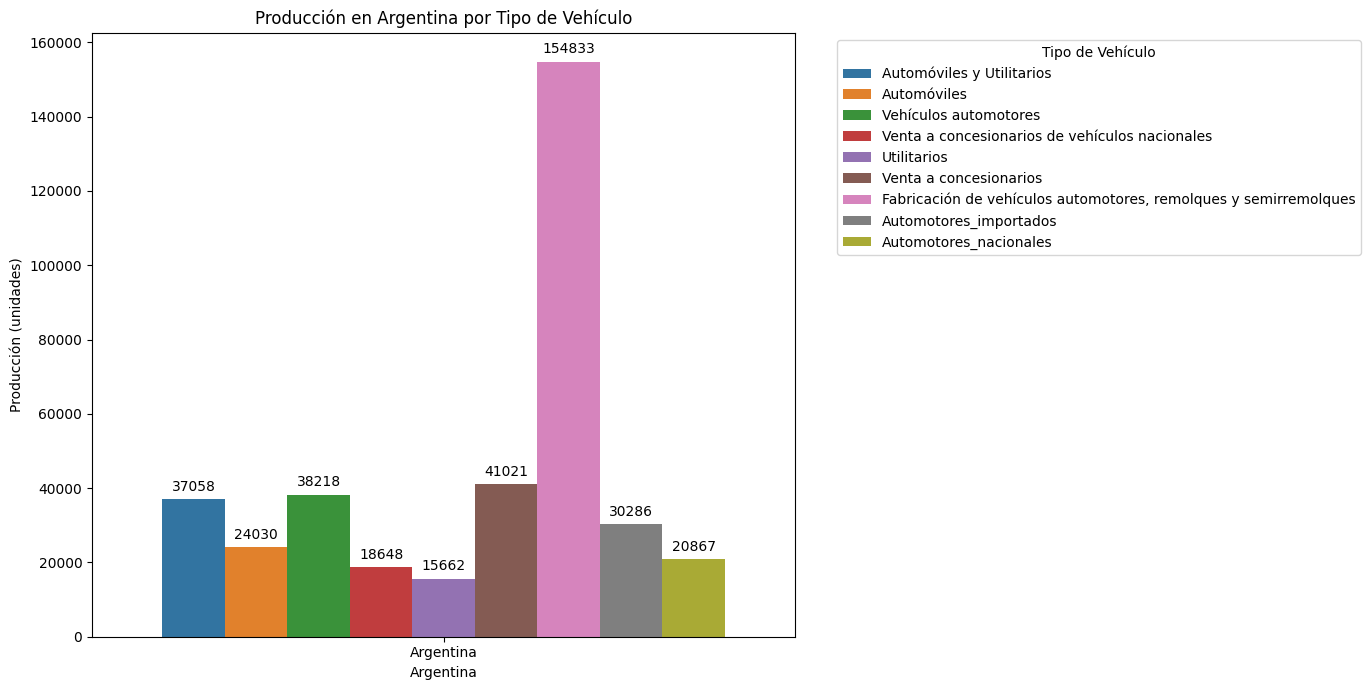

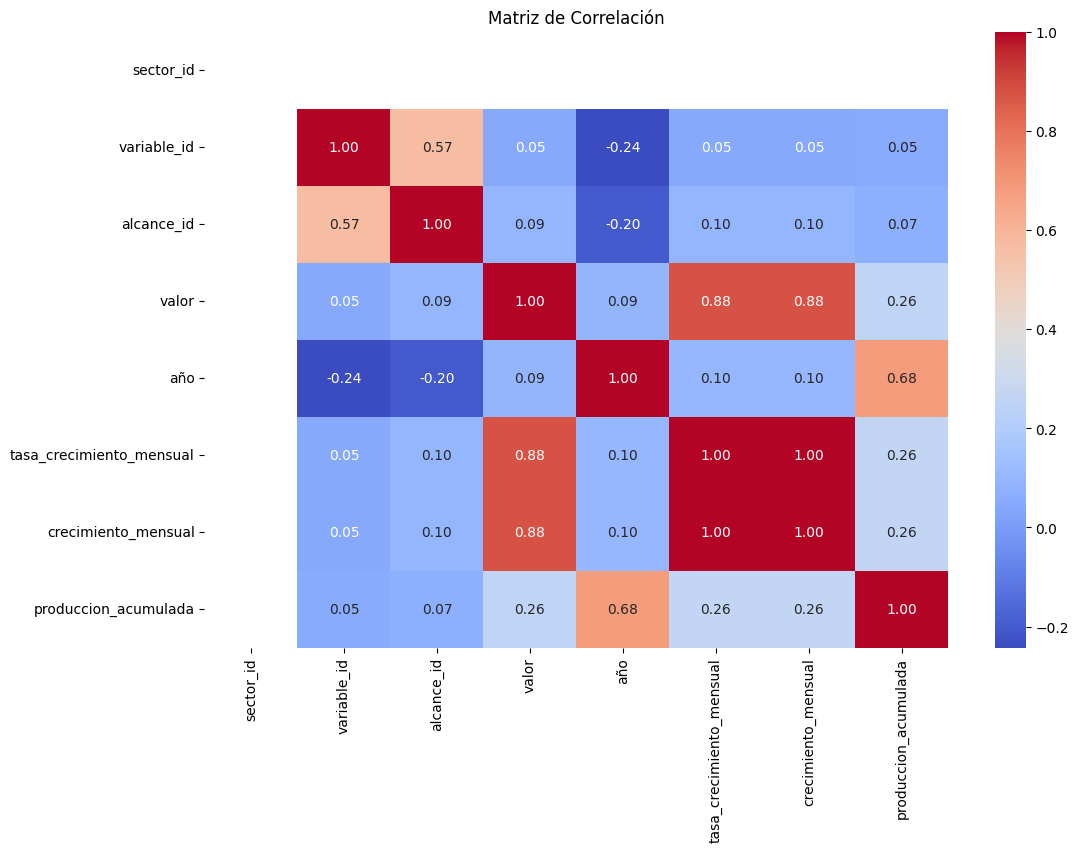

C:\Users\Alecito\AppData\Local\Temp\ipykernel_66240\3766599909.py:183: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='año', y='valor', data=df, ci=None)


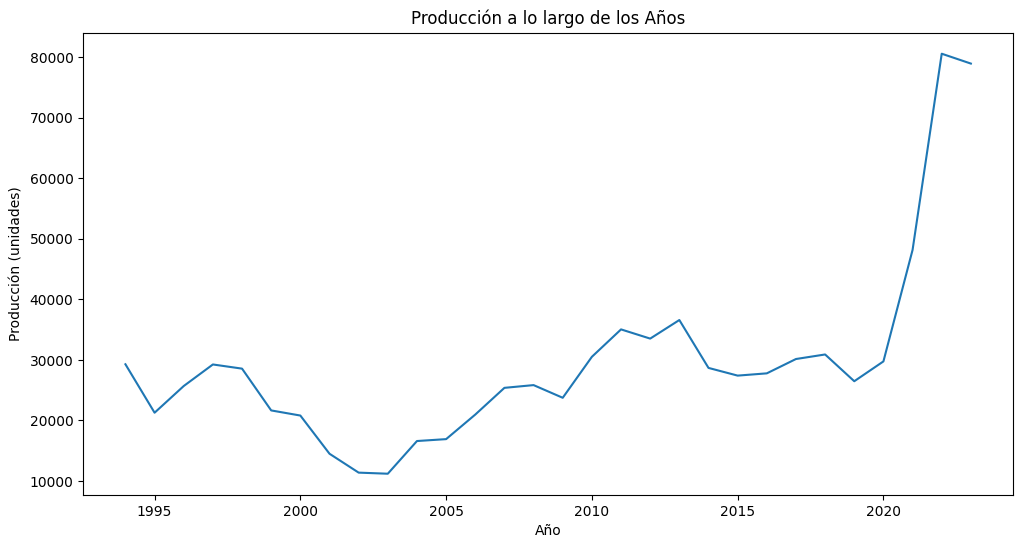

C:\Users\Alecito\AppData\Local\Temp\ipykernel_66240\3766599909.py:195: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot_region = sns.barplot(x='alcance_nombre', y='valor', data=df, ci=None, palette=colores_personalizados)
C:\Users\Alecito\AppData\Local\Temp\ipykernel_66240\3766599909.py:195: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_region = sns.barplot(x='alcance_nombre', y='valor', data=df, ci=None, palette=colores_personalizados)


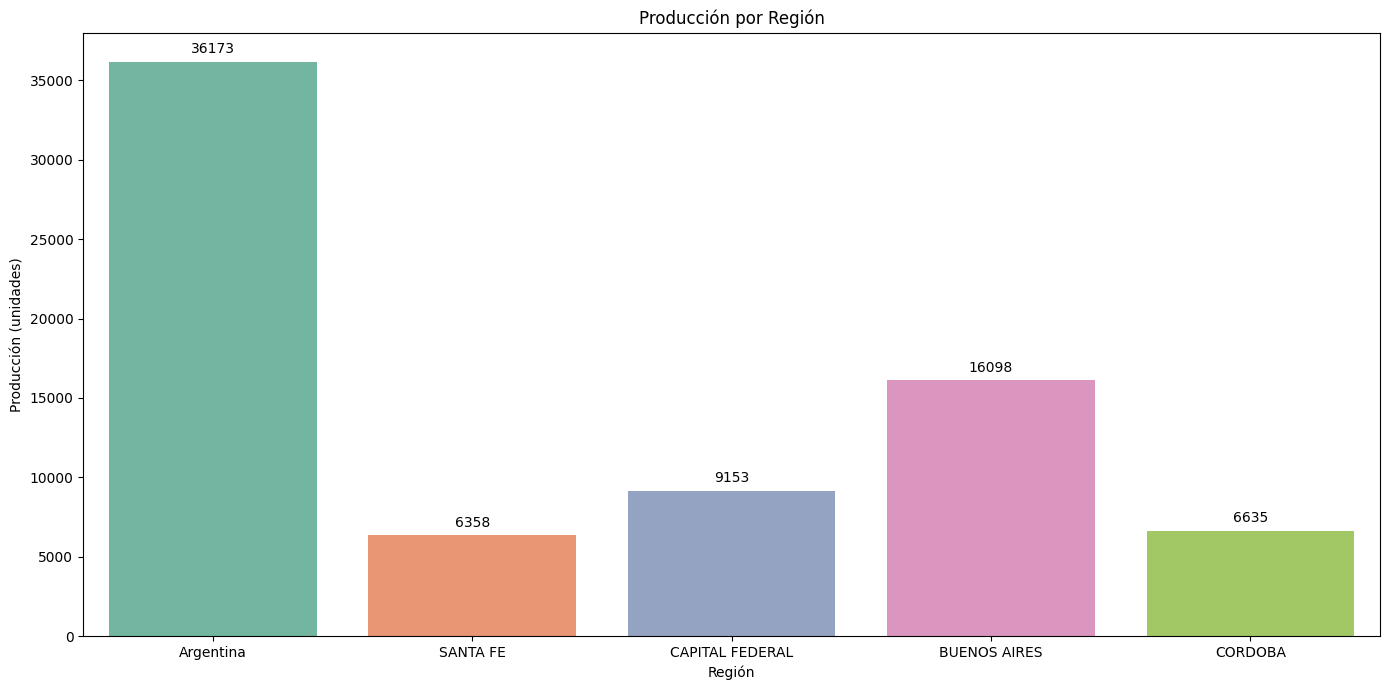

C:\Users\Alecito\AppData\Local\Temp\ipykernel_66240\3766599909.py:218: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mes', y='valor', data=df, ci=None)


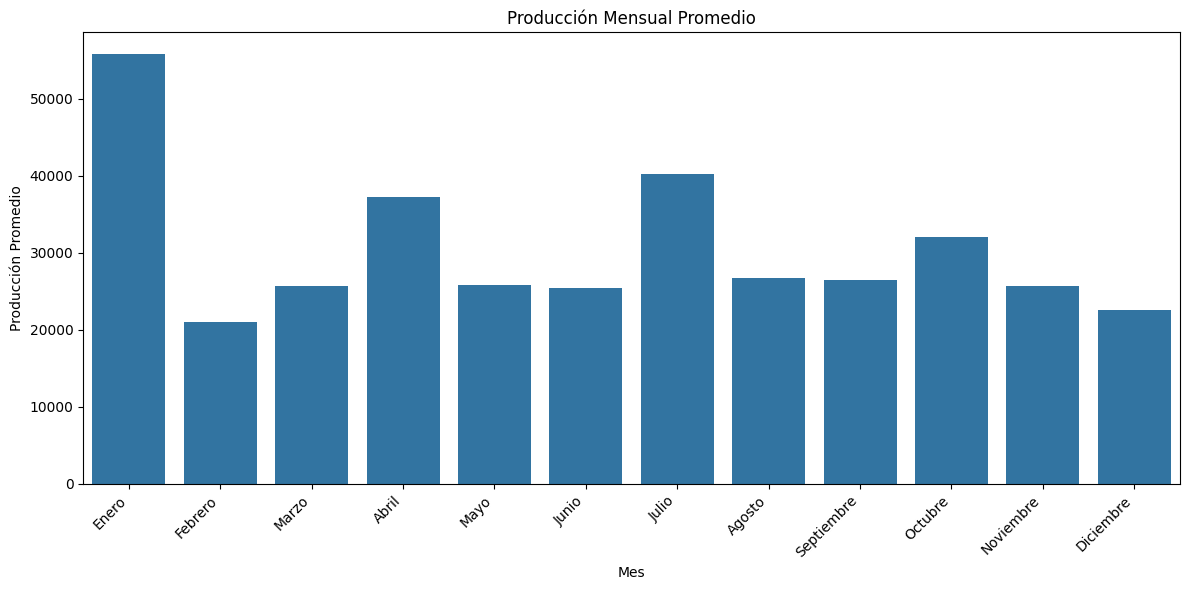

C:\Users\Alecito\AppData\Local\Temp\ipykernel_66240\3766599909.py:228: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot_indicador_fuente = sns.barplot(x='indicador', y='valor', data=df_filtered_fuente, hue='fuente', ci=None)
C:\Users\Alecito\AppData\Local\Temp\ipykernel_66240\3766599909.py:237: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot_indicador_fuente.set_xticklabels(barplot_indicador_fuente.get_xticklabels(), rotation=45, ha='right')


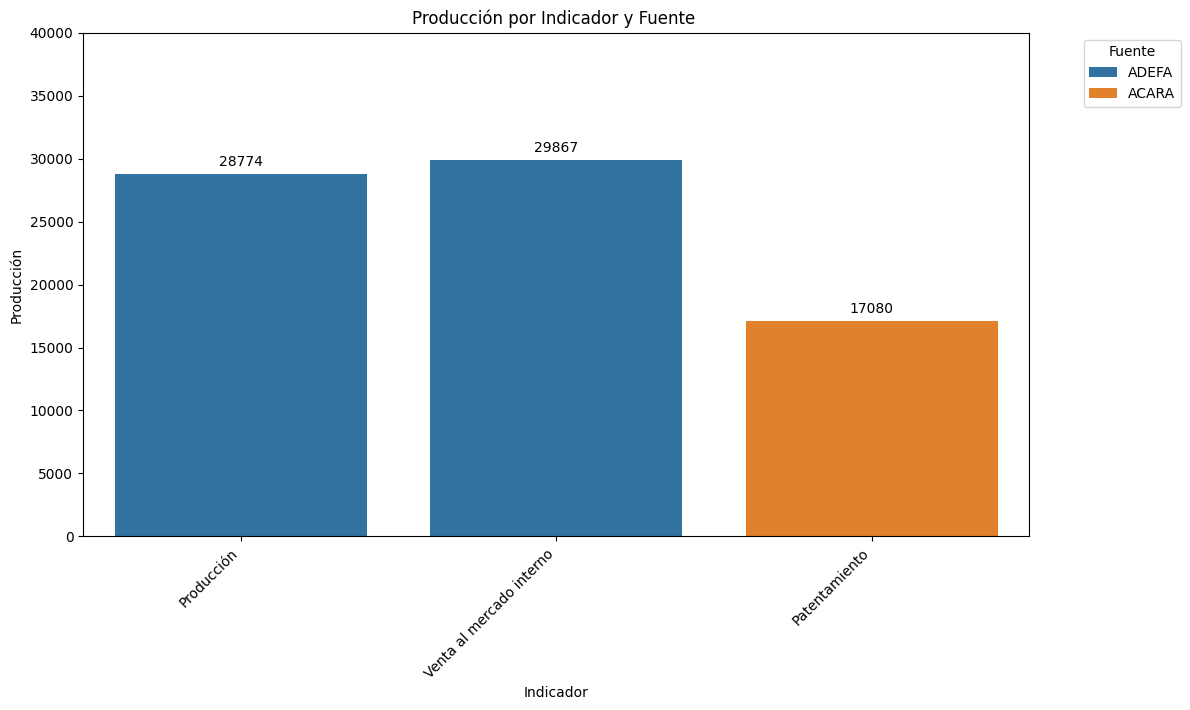

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el DataFrame desde el archivo CSV o desde la fuente de datos
df = pd.read_csv("I:/Mi unidad/Personal/CursosG/cursos/estudios de caso/automotrizautopartista.csv", encoding='latin1')

# Muestra las primeras filas del DataFrame para verificar que los datos se han cargado correctamente
print(df.head())

# Verificar valores nulos
print("Valores nulos antes de la limpieza:")
print(df.isnull().sum())

# Eliminar filas con valores nulos
df = df.dropna()

# Verificar duplicados
print("\nDuplicados antes de la limpieza:")
print(df.duplicated().sum())

# Eliminar duplicados
df = df.drop_duplicates()

# Ordenar por columnas específicas (por ejemplo, por 'indice_tiempo')
df = df.sort_values(by='indice_tiempo')

# Filtrar datos según condiciones específicas
# (por ejemplo, mantener solo filas donde 'valor' sea mayor que un umbral)
umbral = 5000
df = df[df['valor'] > umbral]

# Verificar valores nulos después de la limpieza
print("\nValores nulos después de la limpieza:")
print(df.isnull().sum())

# Verificar duplicados después de la limpieza:
print("\nDuplicados después de la limpieza:")
print(df.duplicated().sum())

# Convertir 'indice_tiempo' a tipo datetime
df['indice_tiempo'] = pd.to_datetime(df['indice_tiempo'])

# Convertir 'valor' a tipo numérico, manejar errores como NaN
df['valor'] = pd.to_numeric(df['valor'], errors='coerce')

# Crear nuevas columnas según sea necesario (por ejemplo, año y mes a partir de 'indice_tiempo')
df['año'] = df['indice_tiempo'].dt.year
df['mes'] = df['indice_tiempo'].dt.month_name()

# Realizar cálculos relevantes (por ejemplo, calcular el promedio de 'valor' por año)
promedio_por_año = df.groupby('año')['valor'].mean()

#  Cálculos y Métricas
df['tasa_crecimiento_mensual'] = df['valor'].pct_change() * 100

# Ejemplo de Análisis Exploratorio de Datos (EDA)
plt.figure(figsize=(12, 6))
plt.plot(df['indice_tiempo'], df['valor'], label='Producción')
plt.title('Tendencia de Producción a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Producción')
plt.ticklabel_format(style='plain', axis='y')  # Evitar notación científica en el eje Y
plt.legend()
plt.show()

# Cálculos y Métricas
promedio_por_mes = df.groupby('mes')['valor'].mean()
print("Promedio de Producción por Mes:")
print(promedio_por_mes)

# Traducción de los nombres de los meses
meses_en_ingles = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
meses_en_espanol = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df['mes'] = df['mes'].replace(dict(zip(meses_en_ingles, meses_en_espanol)))

# Ejemplo de Visualización (Barplot) con ajuste de espacio entre columnas
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='mes', y='valor', data=df, ci=None)
plt.title('Producción Mensual Promedio')
plt.xlabel('Mes')
plt.ylabel('Producción Promedio')

# Anotar valores enteros en las columnas
for p in barplot.patches:
    barplot.annotate(int(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xticks(rotation=45, ha='right')  # Rotar los nombres de los meses
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

# Cálculos adicionales
df['crecimiento_mensual'] = df['valor'].pct_change()
df['produccion_acumulada'] = df.groupby('actividad_producto_nombre')['valor'].cumsum()

# Imprimir resultados
print("\nCrecimiento Mensual:")
print(df[['indice_tiempo', 'actividad_producto_nombre', 'crecimiento_mensual']])

print("\nProducción Acumulada:")
print(df[['indice_tiempo', 'actividad_producto_nombre', 'produccion_acumulada']])

# Visualización (ejemplo)
plt.figure(figsize=(12, 6))
sns.lineplot(x='indice_tiempo', y='valor', data=df, hue='actividad_producto_nombre')
plt.title('Producción a lo largo del tiempo por Tipo de Vehículo')
plt.xlabel('Fecha')
plt.ylabel('Producción (unidades)')
plt.legend(title='Tipo de Vehículo', loc='upper left')
plt.show()

# Crear un gráfico de línea para visualizar la producción a lo largo de los años
plt.figure(figsize=(12, 6))
sns.lineplot(x='año', y='valor', data=df, hue='actividad_producto_nombre')
plt.title('Producción a lo largo de los Años por Tipo de Vehículo')
plt.xlabel('Año')
plt.ylabel('Producción (unidades)')
plt.legend(title='Tipo de Vehículo', loc='upper left')
plt.show()

# Calcular el crecimiento anual de la producción
crecimiento_anual = df.groupby('año')['valor'].pct_change() * 100

# Visualizar el crecimiento anual
plt.figure(figsize=(10, 6))
sns.lineplot(x='año', y=crecimiento_anual, data=df)
plt.title('Crecimiento Anual de la Producción')
plt.xlabel('Año')
plt.ylabel('Crecimiento Anual (%)')
plt.show()


# Visualizar la producción por región y tipo de vehículo con exclusión de variables y mejoras visuales
exclude_region = ['CAPITAL FEDERAL', 'SANTA FE', 'CORDOBA', 'BUENOS AIRES']
exclude_tipo_vehiculo = 'Automotores'

# Filtrar el DataFrame excluyendo las variables no deseadas
df_filtered_region_tipo = df[~((df['alcance_nombre'].isin(exclude_region)) & (df['actividad_producto_nombre'] == exclude_tipo_vehiculo))]

# Crear un gráfico de barras
plt.figure(figsize=(14, 7))
barplot_region_tipo = sns.barplot(x='alcance_nombre', y='valor', data=df_filtered_region_tipo, hue='actividad_producto_nombre', ci=None)
plt.title('Producción en Argentina por Tipo de Vehículo')
plt.xlabel('Argentina')
plt.ylabel('Producción (unidades)')
plt.legend(title='Tipo de Vehículo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar leyenda
plt.tight_layout()

# Anotar valores enteros en las columnas
for p in barplot_region_tipo.patches:
    if p.get_height() > 0:  # Evitar anotar el valor 0
        barplot_region_tipo.annotate(int(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 9), 
                       textcoords='offset points')

plt.show()


# Excluir columnas no numéricas antes de calcular la matriz de correlación
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación mediante un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Gráfico de línea para la producción a lo largo de los años
plt.figure(figsize=(12, 6))
sns.lineplot(x='año', y='valor', data=df, ci=None)
plt.title('Producción a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Producción (unidades)')
plt.show()

# Gráfico de barras para mostrar la producción por región con colores personalizados
plt.figure(figsize=(14, 7))

# Define una paleta de colores personalizada
colores_personalizados = sns.color_palette("Set2", len(df['alcance_nombre'].unique()))

barplot_region = sns.barplot(x='alcance_nombre', y='valor', data=df, ci=None, palette=colores_personalizados)

plt.title('Producción por Región')
plt.xlabel('Región')
plt.ylabel('Producción (unidades)')

# Ajustar leyenda
plt.tight_layout()

# Anotar valores enteros en las columnas
for p in barplot_region.patches:
    if p.get_height() > 0:  # Evitar anotar el valor 0
        barplot_region.annotate(int(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 9), 
                       textcoords='offset points')

plt.show()


# Gráfico de barras para mostrar tendencias estacionales mensuales
plt.figure(figsize=(12, 6))
sns.barplot(x='mes', y='valor', data=df, ci=None)
plt.title('Producción Mensual Promedio')
plt.xlabel('Mes')
plt.ylabel('Producción Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres de los meses
plt.tight_layout()
plt.show()

# Gráfico de barras agrupadas para comparar indicadores y fuentes
plt.figure(figsize=(12, 6))
barplot_indicador_fuente = sns.barplot(x='indicador', y='valor', data=df_filtered_fuente, hue='fuente', ci=None)
plt.title('Producción por Indicador y Fuente ')
plt.xlabel('Indicador')
plt.ylabel('Producción')
plt.legend(title='Fuente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.ylim(0, 40000)  # Ajustar la escala del eje y

# Quitar el valor 0 en el eje x encima de la palabra "producción"
barplot_indicador_fuente.set_xticklabels(barplot_indicador_fuente.get_xticklabels(), rotation=45, ha='right') 

# Anotar valores enteros en las columnas
for p in barplot_indicador_fuente.patches:
    if p.get_height() > 0:  # Evitar anotar el valor 0
        barplot_indicador_fuente.annotate(int(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 9), 
                       textcoords='offset points')

plt.show()



